In [1]:
#!/usr/bin/env python3
"""
Date : 2019, APRIL
Author : Apiwit Theeraporn
"""

'\nDate : 2019, APRIL\nAuthor : Apiwit Theeraporn\n'

In [2]:
# import libraries

In [3]:
import os
from io import BytesIO

In [4]:
# keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint

# use tensorflow backend
import tensorflow

Using TensorFlow backend.


In [5]:
import numpy as np

import PIL

import cv2

import IPython
from IPython.display import display,Image,clear_output

In [6]:
# pre-deterministic input

In [7]:
train_dir = 'processed_images/'

# input image dimensions
img_rows, img_cols = 215, 240

# Batch_size to train
batch_size = 8

# Number of epochs to train
nb_epoch = 20  

# Total number of convolutional filters to use ~ batch
nb_filters = 8

# Max pooling
nb_pool = 2

# Size of convolution kernel
nb_conv = 5

kernel_size = (nb_conv,nb_conv);

In [8]:
# pre-deterministic function

In [9]:
# Display : Use this method instead of cv2.imageShow
def iPythonDisplay(img_arr, fmt='jpeg'):
    with BytesIO() as output:
        with PIL.Image.fromarray(img_arr) as img:
            img.save(output,format=fmt);
        img_byte = output.getvalue()
    display(Image(data=img_byte))

In [10]:
# Keras load images from folder

In [11]:
# flow_from_directory will first load data from it's config
"""
The function will run after the image is resized and augmented. 
The function should take one argument: an image (Numpy tensor with rank 3), 
and should output a Numpy tensor with the same shape.
"""
datagen = image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # reserve some data for validation
)

# number of channels
# For 'grayscale' use 1 ,and for 'rgb' images use 3
img_channels = 1

# import first then transform
processed_train_generator = datagen.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    target_size = (img_rows, img_cols),
    class_mode="categorical",
    color_mode = 'grayscale',
    subset='training',
)

processed_valid_generator = datagen.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    target_size = (img_rows, img_cols),
    class_mode="categorical",
    color_mode = 'grayscale',
    subset='validation',
)


nb_classes = len(processed_train_generator.class_indices)
print('all classes : ',processed_valid_generator.class_indices)
print('got total class =',len(processed_train_generator.class_indices));

Found 32 images belonging to 4 classes.
Found 8 images belonging to 4 classes.
all classes :  {'buff': 0, 'fist': 1, 'luv': 2, 'rock': 3}
got total class = 4


In [12]:
# define model

In [13]:
model = Sequential()

model.add(Conv2D(
    nb_filters, 
    kernel_size,
    input_shape=(img_rows, img_cols,img_channels)))
    # i.e. input_shape=(128, 128, 3) for 128x128 RGB pictures
convout1 = Activation('relu')
model.add(convout1)
model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 211, 236, 8)       208       
_________________________________________________________________
activation_1 (Activation)    (None, 211, 236, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 207, 232, 8)       1608      
_________________________________________________________________
activation_2 (Activation)    (None, 207, 232, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 103, 116, 8)       0         
_________________________________________________________________

In [14]:
STEP_SIZE_TRAIN=processed_train_generator.batch_size

STAMP = 'best_gesture_iteration'
early_stopping =EarlyStopping(monitor='val_loss', patience=5)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=False)


model.fit_generator(
        processed_train_generator,
        epochs=nb_epoch,
        steps_per_epoch=STEP_SIZE_TRAIN,
        verbose=1,
        validation_data=processed_valid_generator,
        use_multiprocessing = True,
        workers = 2, #CPU 4 cores,
        callbacks= [early_stopping, model_checkpoint]
        )

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1/8 [==>...........................] - ETA: 10s - loss: 1.3786 - acc: 0.3750

Process ForkPoolWorker-4:
Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/apiwitt/.pyenv/versions/3.6.8/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/apiwitt/.pyenv/versions/3.6.8/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/apiwitt/.pyenv/versions/3.6.8/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/apiwitt/.pyenv/versions/3.6.8/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/apiwitt/.pyenv/versions/3.6.8/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/apiwitt/.pyenv/versions/3.6.8/lib/python3.6/multiprocessing/process.py", line 93, i

KeyboardInterrupt: 

In [27]:
# predict data ex. in sample

In [28]:
#load model
# from keras.models import load_model
# model = load_model('best_gesture_iteration.h5')

In [29]:
predict = model.predict_generator(
    processed_valid_generator, 
    steps=None, 
    callbacks=None, 
    workers=2, 
    use_multiprocessing=True, 
    verbose=1)

print('all classes : ',processed_valid_generator.class_indices)
np.round(predict)

1/1 [==============================] - 0s 370ms/step
all classes :  {'buff': 0, 'fist': 1, 'luv': 2, 'rock': 3}


array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [30]:
# Single image prediction

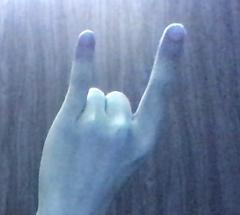

In [31]:
test_path = 'raw_images/train/rock_33.png'
test_image = cv2.imread(test_path)
iPythonDisplay(test_image)

In [32]:
# rgb --> grayscale with shape
def grayMorphGradient(image):
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB);
    m = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size); # Cross Morph
    morph = cv2.morphologyEx(rgb, cv2.MORPH_GRADIENT, m);
    _open = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel_size) # Eliminate background noise
    final = cv2.cvtColor(_open, cv2.COLOR_RGB2GRAY);
    return final

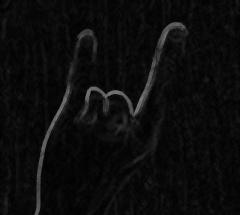

In [33]:
test_image = grayMorphGradient(test_image)
iPythonDisplay(test_image)

In [34]:
# reshape Conv2D input
conv2D_input = np.array(test_image)
# normalize by /255
conv2D_input = conv2D_input/255
# reshape to (batch, rows, cols, channels) 
# img_rows, img_cols = 215,240 
# img_channels : grayscale = 1
conv2D_input = conv2D_input.reshape(1,img_rows,img_cols,img_channels)

In [35]:
from keras.models import load_model
model = load_model('best_gesture_iteration.h5')

In [51]:
result = np.round(model.predict(conv2D_input))
nb_classes = len(processed_train_generator.class_indices)
print('all classes : ',list(processed_valid_generator.class_indices))
print('result =',result);

all classes :  ['buff', 'fist', 'luv', 'rock']
result = [[0. 0. 0. 1.]]
